# P411 - Assignment 6
Kristi Webb, Oct 16 2015

github k-a-webb

In [1]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## Q1 Error bounds on coherence estimates

<div style='background:#F0F0F0'>  The 95% confidence intervals for the coherence squared $\gamma^2_{xy}(f)$ between two variables $x(t)$ and $y(t)$ are approximately:
$$ \gamma^2_{xy} \pm \frac{\sqrt{2}\left(1+\gamma^2_{xy}\right)}{\left|\gamma_{xy} \right|\sqrt{n_d}}$$
where $n_d$ is the number of blocks used to calculate the coherence.  

You **may** use `matplotlib.mlab.csd` for the following question, but you had best use it correctly!
</div>

<div style='background:#F0F0F0'>**1** Make an input process $x(t)$ as random Gaussian noise, and the output process the sum of a noise source and a running average of the input: $y(t)=n(t)+\frac{1}{b}\int_{t-b}^t x(t')dt'$ and plot (Zoom so we can see whats going on, and label your plot).  Make sure you generate a large time series.</div> 

In [2]:
N = 2048*24
b = 10
Nfft = 64

def movingaverage(interval, b):
    window = np.ones(int(b))/float(b)
    return np.convolve(interval, window, 'same')


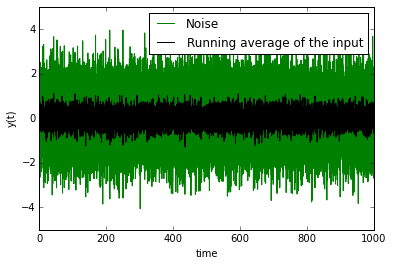

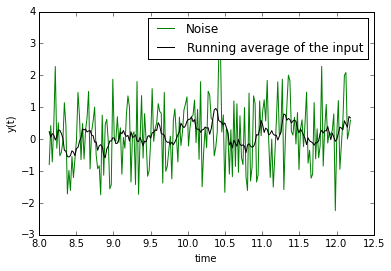

In [3]:
t = np.arange(0., 1000., 1000./N)
dt = np.median(np.diff(t))

x = np.random.randn(N)    
y = movingaverage(x, b)

plt.plot(t, x, '-g', label='Noise')
plt.plot(t, y, '-k', label='Running average of the input')
plt.xlabel('time') ; plt.ylabel('y(t)') ; plt.legend() ; plt.show()

plt.plot(t[400:600], x[400:600], '-g', label='Noise')
plt.plot(t[400:600], y[400:600], '-k', label='Running average of the input')
plt.xlabel('time') ; plt.ylabel('y(t)') ; plt.legend() ; plt.show()

<div style='background:#F0F0F0'>**2** Compute the coherence squared of the input and the output.  Make a plot with the spectra in the upper panel and the coherence squared in the middle panel and the phase in the bottom.

You will need to choose a value for your fft length.  Choose a relative low one to get a smooth plot.
</div>

$$\gamma^2(f) \equiv \frac{|G_{xF}(f)|^2}{G_{xx}G_{FF}}.$$

In [4]:
Gyy, fyy = mlab.psd(y, NFFT=Nfft, Fs=1./dt, window=mlab.window_hanning, noverlap=Nfft/2)
# x is the Forcing function in this case (?)
Gff, fff = mlab.psd(x, NFFT=Nfft, Fs=1./dt, window=mlab.window_hanning, noverlap=Nfft/2)
Gyf, fyf = mlab.csd(y, x, NFFT=Nfft, Fs=1./dt, window=mlab.window_hanning, noverlap=Nfft/2);

coh = np.abs(Gyf)**2 / (Gyy * Gff)
ph = np.arctan2(np.imag(Gyf), np.real(Gyf)) / np.pi  # Normalized by pi

/Users/kawebb/venv/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


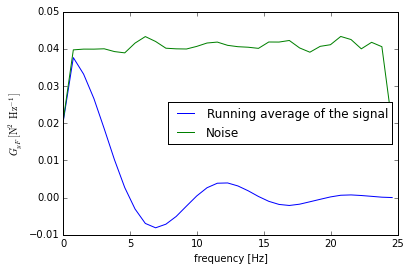

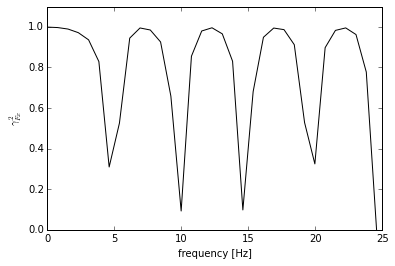

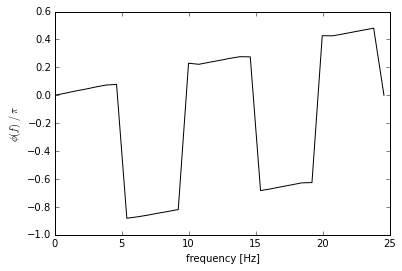

In [5]:
plt.plot(fyf, Gyf, label='Running average of the signal')
plt.plot(fff, Gff, label='Noise')
plt.ylabel(r'$G_{yF}\ \mathrm{[N^2\ Hz^{-1}]}$') ; plt.xlabel('frequency [Hz]') ; plt.legend(loc=5) ; plt.show()

plt.plot(fyy, coh, 'k')
plt.ylim(0., 1.1) ; plt.ylabel('$\gamma^2_{Fx}$') ; plt.xlabel('frequency [Hz]') ; plt.show()

plt.plot(fyy, ph, 'k')
plt.ylabel('$\phi(f)\ /\ \pi$') ; plt.xlabel('frequency [Hz]') ; plt.show()

In the top panel with the spectra it shows how the taking the running average suppresses the noise, where the peaks at low frequency depend on the value of 'b'. The coherence heas peaks at regular intervals where the noise is dominant in the signal and there are peaks in the noise spectrum, and is constant at one elsewhere. With the phase normalized by pi such that it shows the change from going 180 degrees to -180 degress out of phase. We see that for the frequency range between the peaks of the coherence function, the phase changes as well as steadily increases (~linearly) as the frquency increases.

<div style='background:#F0F0F0'>**3** Now repeat the above for three different values of NFFT, each 5 times as large as the next.  Plot the resulting coherence squared functions in separate panels.  Add the confidence intervals to your plot and comment on which peaks are significant.
</div>

In [6]:
def coherance(x, y, Nfft, dt=1.):
    Gyy, fyy = mlab.psd(y, NFFT=Nfft, Fs=1./dt, window=mlab.window_hanning, noverlap=Nfft/2)
    Gff, fff = mlab.psd(x, NFFT=Nfft, Fs=1./dt, window=mlab.window_hanning, noverlap=Nfft/2)
    Gyf, fyf = mlab.csd(y, x, NFFT=Nfft, Fs=1./dt, window=mlab.window_hanning, noverlap=Nfft/2);

    coh = np.abs(Gyf)**2 / (Gyy * Gff)
    ph = np.arctan2(np.imag(Gyf), np.real(Gyf)) / np.pi  # Normalized by %pinfo
    
    nd = (len(x) / float(Nfft))*2 - 1  # since every block is overlaped by half
    sig = np.sqrt(2)*(1 + coh) / (np.sqrt(np.abs(coh)) * np.sqrt(np.abs(nd)))

    return coh, fyy, sig

coh_2, fyy_2, sig_2 = coherance(x, y, 5*Nfft, dt)
coh_3, fyy_3, sig_3 = coherance(x, y, 25*Nfft, dt)
coh_4, fyy_4, sig_4 = coherance(x, y, 125*Nfft, dt)

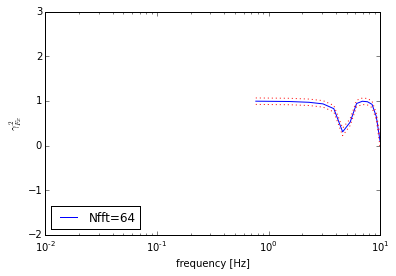

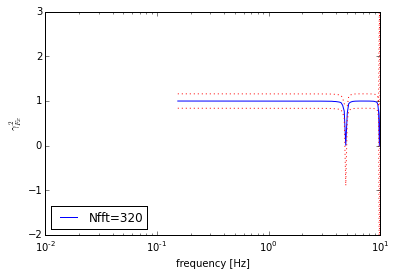

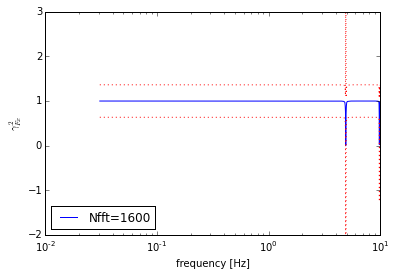

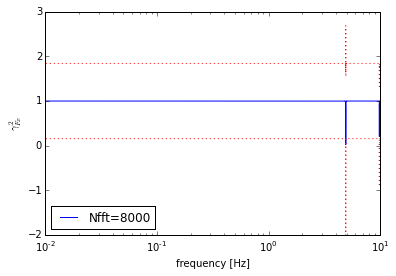

In [7]:
nd = (len(x)/float(Nfft))*2 - 1
sig = np.sqrt(2)*(1+coh)/(np.sqrt(np.abs(coh))*np.sqrt(nd))

plt.semilogx(fyy, coh, label='Nfft={}'.format(Nfft))
plt.semilogx(fyy, coh+sig, ':r') ; plt.plot(fyy, coh-sig, ':r')
plt.ylim(-2,3) ; plt.xlim(0.01, 10)
plt.ylabel('$\gamma^2_{Fx}$') ; plt.xlabel('frequency [Hz]') ; plt.legend(loc=3) ; plt.show()

for i in range(1,4):
    
    coh_t, fyy_t, sig_t = coherance(x, y, (5**i)*Nfft, dt)
    
    plt.semilogx(fyy_t, coh_t, label='Nfft={}'.format(Nfft*(5**i)))
    plt.semilogx(fyy_t, coh_t+sig_t, ':r') ; plt.plot(fyy_t, coh_t-sig_t, ':r')
    plt.ylim(-2,3) ; plt.xlim(0.01, 10)
    plt.ylabel('$\gamma^2_{Fx}$') ; plt.xlabel('frequency [Hz]') ; plt.legend(loc=3) ; plt.show()


We see that the spectra with more data in the blocks (i.e. higher Nfft) are much smoother which is an artifact of having less blocks such that there is less data to average. We also see that with more blocks (lower Nfft) the frequency range is shorter.

## Q2: Shear turbulence data

Download the data abaove. `time` is a measurement time in seconds. `shear` is a little less than 300 s of data from a turbulence shear probe. Units are $s^{-1}$. `ac` is a suitably scaled acceleration of the vehicle containing the shear probes.

**1** Plot the shear time series and the accelerometer time series.  Comment on any similarities and differences.  Comment on the stationarity of the time series.

In [8]:
time=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/time.txt')
ac=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/ac.txt')
shear=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/s.txt')

In [9]:
dt = np.diff(time)[0]

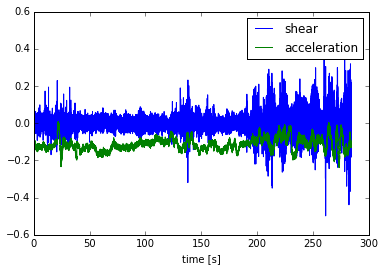

In [10]:
plt.plot(time, shear, label='shear')
plt.plot(time, ac, label='acceleration')
plt.xlabel('time [s]') ; plt.legend() ; plt.show()

It appears that for both signals there is a period of quiescence between 50-120 s at which point both spectra seem to become more turbulent. The shear has much stronger variation, but seems to be somewhat constant about 0, whereas the acceleration is approximately constant about -0.1.
The data seem to be somewhat stationary in terms of that the spectra are flat, but the variance is not constant. To determine whether or not this is a periodic process would require additional data, but we expect from the nature of shear and acceleration. We see from the next plot that the auto-correlation (or a function like it, Gxy) is not constant over time.

**2** Compute the power spectra of the two signals and the coherence squared (you could do the phase too, but it is not too thrilling).  Comment on the spectral similarities and the coherence.  

In [11]:
Nfft = 256

def calcs(x, y, Nfft, dt):
    Gxx, fxx = mlab.psd(x, NFFT=Nfft, Fs=1./dt, window=mlab.window_hanning, noverlap=Nfft/2)
    Gyy, fyy = mlab.psd(y, NFFT=Nfft, Fs=1./dt, window=mlab.window_hanning, noverlap=Nfft/2)
    Gxy, fxy = mlab.csd(x, y, NFFT=Nfft, Fs=1./dt, window=mlab.window_hanning, noverlap=Nfft/2);

    coh = np.abs(Gxy)**2 / (Gxx * Gyy)
    return Gxx, Gyy, Gxy, coh, fxx
    
Gaa, Gss, Gas, coh, faa = calcs(ac, shear, Nfft, dt)

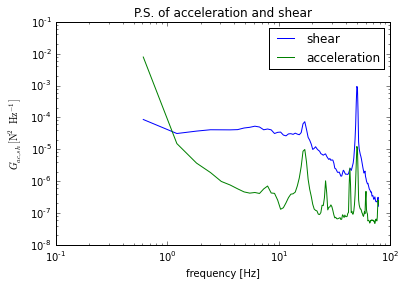

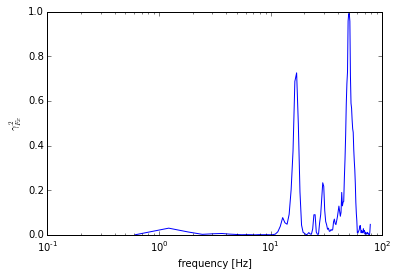

In [12]:
plt.loglog(faa, Gss, label='shear') 
plt.loglog(faa, Gaa, label='acceleration') 
plt.title('P.S. of acceleration and shear')
plt.ylabel(r'$G_{ac,sh}\ \mathrm{[N^2\ Hz^{-1}]}$') ; plt.xlabel('frequency [Hz]') ; plt.legend() ; plt.show()

plt.semilogx(faa, coh)
plt.ylabel('$\gamma^2_{Fx}$') ; plt.xlabel('frequency [Hz]') ; plt.show()


The peaks of the coherence-squared function correspond to the peaks in the spectrum of both the acceleration and shear (shown in the first plot). We can see all of the peaks in the spectrum of the shear also appear as peaks in the acceleration, the same peaks being where the correlation is highest.

**3** Compute a spectra that has the contamination from the vibration removed. Comment on how well your correction worked.

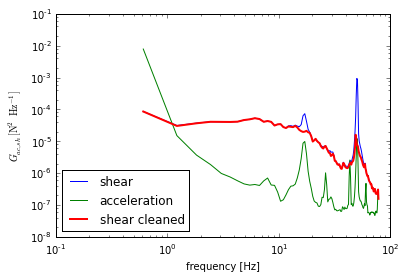

In [13]:
Gss2 =  Gss - abs(Gas)**2 / Gaa  # As done in the last part of Lecture 6

plt.loglog(faa, Gss, label='shear') 
plt.loglog(faa, Gaa, label='acceleration') 
plt.loglog(faa, Gss2, label='shear cleaned', linewidth=2) 
plt.ylabel(r'$G_{ac,sh}\ \mathrm{[N^2\ Hz^{-1}]}$') ; plt.xlabel('frequency [Hz]') ; plt.legend(loc=3) ; plt.show()

The removal of the contamination by this method seems to have done a good job in removing the first peak (~ f=20 Hz), but only partly removed the second peak at f=50 Hz. This is because we essentially only removed the peaks which were in the coherence-squared function. 

**4** Chose two separate periods of the time series, one that is "turbulent" and one that is "quiet", and plot the raw and corrected shear spectra.  Comment on the differences and the effect of the correction on each spectral estimate.    

/Users/kawebb/venv/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


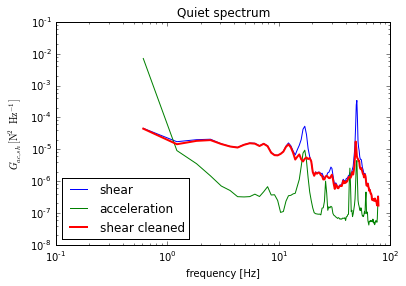

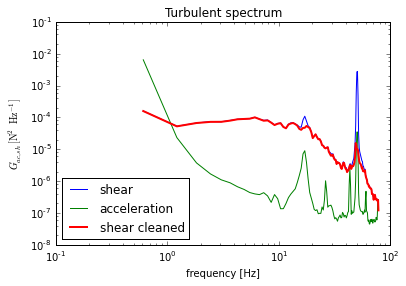

In [14]:
def shorten(x, y1, y2, i1, i2):
    T = len(x)*(np.diff(x)[0])
    idx1 = np.floor(len(x)*i1/T)
    idx2 = np.floor(len(x)*i2/T)
    return x[idx1:idx2], y1[idx1:idx2], y2[idx1:idx2]

# quiet 1-5 Hz -> 70-150s
tq, acq, shq = shorten(time, ac, shear, 70, 150)
Gaaq, Gssq, Gasq, cohq, faaq = calcs(acq, shq, Nfft, dt)
Gssq2 =  Gssq - abs(Gasq)**2 / Gaaq

plt.loglog(faaq, Gssq, label='shear') 
plt.loglog(faaq, Gaaq, label='acceleration') 
plt.loglog(faaq, Gssq2, label='shear cleaned', linewidth=2)
plt.title('Quiet spectrum')
plt.ylabel(r'$G_{ac,sh}\ \mathrm{[N^2\ Hz^{-1}]}$') ; plt.xlabel('frequency [Hz]') ; plt.legend(loc=3) ; plt.show()


# turbulent 5-15 Hz -> 200-280s
tt, act, sht = shorten(time, ac, shear, 200, 280)
Gaat, Gsst, Gast, coht, faat = calcs(act, sht, Nfft, dt)
Gsst2 =  Gsst - abs(Gast)**2 / Gaat

plt.loglog(faat, Gsst, label='shear') 
plt.loglog(faat, Gaat, label='acceleration') 
plt.loglog(faat, Gsst2, label='shear cleaned', linewidth=2)
plt.title('Turbulent spectrum')
plt.ylabel(r'$G_{ac,sh}\ \mathrm{[N^2\ Hz^{-1}]}$') ; plt.xlabel('frequency [Hz]') ; plt.legend(loc=3) ; plt.show()

The turbulent spectrum appears to be very similar to the shear spectrum for the whole time interval, probably because the signal of the turbulence is much stronger than the quiet signal. As a result we see the 'tubulent' section dominating the spectrum.
In terms of the correction, the peaks are reduced more in the quiet spectrum than the turbulent spectrum. This could be explained in that we expect the accelation and shear to be more correlated during the time interval of tubulence.